In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [134]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [135]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [136]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


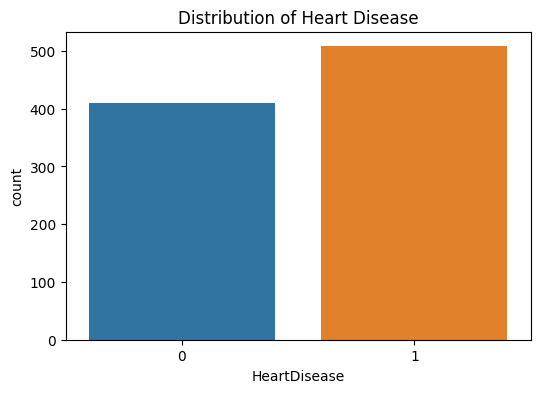

In [138]:
# Visualize the distribution of HeartDisease (target variable)
plt.figure(figsize=(6,4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_984\3360203532.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


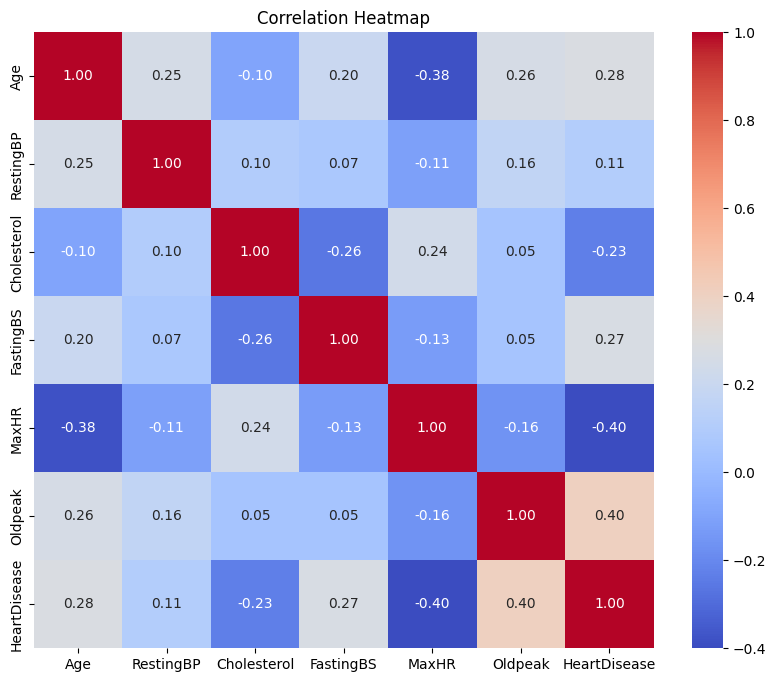

In [139]:
# Plot a heatmap to visualize correlations between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [140]:
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()

In [141]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [142]:
# Feature scaling using StandardScaler for the numerical columns
scaler = StandardScaler()
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [143]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,-0.832432,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.210356,0.596393,0,1,-0.188999,0,0.293283,1,1
914,1.536902,1,0,0.627078,-0.053049,1,1,0.164684,0,2.357094,1,1
915,0.370100,1,0,-0.129513,-0.620168,0,1,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.129513,0.340275,0,0,1.461525,0,-0.832432,1,1


In [144]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [145]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Initialize the models
svm_model = SVC()
dt_model = DecisionTreeClassifier()

In [147]:
# Training and evaluating SVM with cross-validation
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [148]:
# Training and evaluating Decision Tree with cross-validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [149]:
# Performance metrics
svm_report = classification_report(y_test, y_pred_svm)
dt_report = classification_report(y_test, y_pred_dt)

In [150]:
print("SVM Classification Report:\n", svm_report)
print("Decision Tree Classification Report:\n", dt_report)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        77
           1       0.86      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



In [151]:
print("SVM Cross-Validation Accuracy:", svm_cv_scores.mean())
print("Decision Tree Cross-Validation Accuracy:", dt_cv_scores.mean())

SVM Cross-Validation Accuracy: 0.8569564812226261
Decision Tree Cross-Validation Accuracy: 0.7738794147796104


In [152]:
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

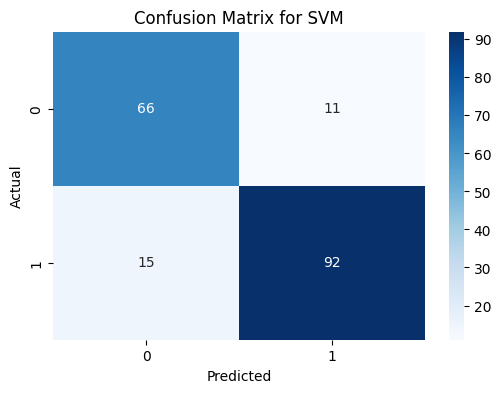

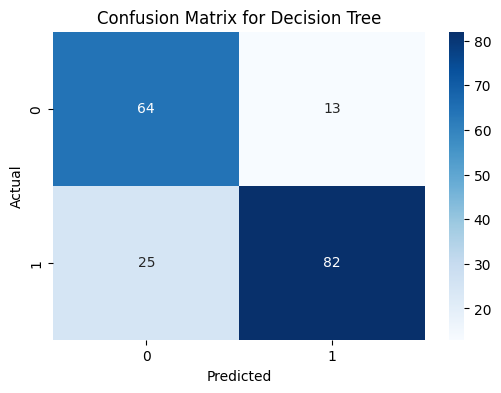

In [153]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
